In [37]:
import pandas as pd
import numpy as np
from collections import defaultdict
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [4]:
# Ablated csv, df and unique scene labels
ablated_csv = 'tut_preds/Cnn9_64mel_tut_selected_ablated_tags.csv'
ablated_df = pd.read_csv(ablated_csv)
scene_labels = ablated_df['labels'].unique()

In [5]:
# Converting the string lists to lists
ablated_df['ablated_scene_preds'] = ablated_df['ablated_scene_preds'].apply(lambda x: ast.literal_eval(x))
ablated_df['audio_tags_org'] = ablated_df['audio_tags_org'].apply(lambda x: ast.literal_eval(x))
ablated_df['audio_tags_ablated'] = ablated_df['audio_tags_ablated'].apply(lambda x: ast.literal_eval(x))

In [45]:
# Counting the change in correct scene preds based on the indices ablated
scenewise_indices = defaultdict(dict)

for scene in scene_labels:
    scenewise_indices[scene] = {i:0 for i in range(16)}

for i, row in ablated_df.iterrows():
    scene = row['labels']
    ablated_scene_preds_ = row['ablated_scene_preds']

    for j in range(len(ablated_scene_preds_)):
        if ablated_scene_preds_[j] != scene:
            scenewise_indices[scene][j] += 1

In [46]:
# Normalizing the indices
for scene in scene_labels:
    for i in scenewise_indices[scene]:
        total = ablated_df['scene_preds'].value_counts()[scene]
        scenewise_indices[scene][i] = (scenewise_indices[scene][i]/total        

In [54]:
# Setting the threshold and determining the important indices
scenewise_imp_indices = defaultdict(dict)
count = 0
for scene in scene_labels:
    scenewise_imp_indices[scene] = []
    for i in scenewise_indices[scene]:
        #scenewise_imp_indices[scene].append(scenewise_indices[scene][i])
        if (scenewise_indices[scene][i]) >= 0.45:
            scenewise_imp_indices[scene].append(i)
            count += 1

In [63]:
ablated_df.columns

Index(['files', 'labels', 'scene_preds', 'ablated_scene_preds',
       'audio_tags_org', 'audio_tags_ablated'],
      dtype='object')

In [68]:
# PANNs unique audio tags and counts for each scene
scene_tag_counts = defaultdict(lambda: defaultdict(int))

for i, row in ablated_df.iterrows():
    scene = row['labels']
    tags = row['audio_tags_org']
    for tag in tags:
        scene_tag_counts[scene][tag] += 1

# Same as scene_tag_counts with better readability
result = []
for scene, tags in scene_tag_counts.items():
    for tag, count in tags.items():
        result.append({'scene':scene, 'audio_tags':tag, 'count':count})

In [94]:
# Creating a nested dictionary to count indices wise missed tags
ablated_tag_counts = defaultdict(dict)

for scene in scene_labels:
    ablated_tag_counts[scene] = defaultdict(dict)
    for i in range(16):
        for event in scene_tag_counts[scene]:
            ablated_tag_counts[scene][i][event] = 0

In [105]:
# Function to determine the missed tags
def missed_tags(ablated_tags, org_tags):
    missed_ = set()
    for i in org_tags:
        if i not in ablated_tags:
            missed_.add(i)
    return list(missed_)

# Counting the missed tags for each scene and each ablated index
for i, row in ablated_df.iterrows():
    scene = row['labels']
    ablated_tags_lists = row['audio_tags_ablated']
    original_tags = row['audio_tags_org']

    for j in range(len(ablated_tags_lists)):
        missed_ = missed_tags(ablated_tags_lists[j], original_tags)
        feat_index = scenewise_imp_indices[scene][j]
        for event in missed_:
            ablated_tag_counts[scene][feat_index][event] += 1

In [107]:
'''
We now have the entire dictionary of all the missed tags for each scene and each ablated index
We can now use this to:
1. look at the important tags for each scene
2. look at the tags correlation for each index
And try to see if that makes semantic sense. 
'''

,airport,bus,metro,metro_station,park,public_square,shopping_mall,street_pedestrian,street_traffic,tram
0,"{'Speech': 2, 'Boat, Water vehicle': 2, 'Vehic...","{'Vehicle': 6, 'Car': 30, 'Boat, Water vehicle...","{'Train': 9, 'Rail transport': 10, 'Railroad c...","{'Train': 0, 'Speech': 0, 'Subway, metro, unde...","{'Speech': 3, 'Vehicle': 5, 'Horse': 3, 'Anima...","{'Speech': 5, 'Vehicle': 2, 'Fire': 1, 'Animal...","{'Speech': 1, 'Vehicle': 55, 'Bus': 6, 'Train'...","{'Speech': 0, 'Vehicle': 14, 'Music': 20, 'Out...","{'Vehicle': 0, 'Traffic noise, roadway noise':...","{'Vehicle': 13, 'Speech': 3, 'Train': 2, 'Rail..."
1,"{'Speech': 0, 'Boat, Water vehicle': 0, 'Vehic...","{'Vehicle': 0, 'Car': 14, 'Boat, Water vehicle...","{'Train': 0, 'Rail transport': 0, 'Railroad ca...","{'Train': 3, 'Speech': 11, 'Subway, metro, und...","{'Speech': 6, 'Vehicle': 6, 'Horse': 0, 'Anima...","{'Speech': 0, 'Vehicle': 0, 'Fire': 0, 'Animal...","{'Speech': 1, 'Vehicle': 1, 'Bus': 6, 'Train':...","{'Speech': 0, 'Vehicle': 0, 'Music': 23, 'Outs...","{'Vehicle': 0, 'Traffic noise, roadway noise':...","{'Vehicle': 1, 'Speech': 1, 'Train': 3, 'Rail ..."
2,"{'Speech': 0, 'Boat, Water vehicle': 2, 'Vehic...","{'Vehicle': 0, 'Car': 0, 'Boat, Water vehicle'...","{'Train': 0, 'Rail transport': 0, 'Railroad ca...","{'Train': 10, 'Speech': 18, 'Subway, metro, un...","{'Speech': 8, 'Vehicle': 3, 'Horse': 0, 'Anima...","{'Speech': 2, 'Vehicle': 0, 'Fire': 1, 'Animal...","{'Speech': 2, 'Vehicle': 0, 'Bus': 1, 'Train':...","{'Speech': 4, 'Vehicle': 1, 'Music': 25, 'Outs...","{'Vehicle': 0, 'Traffic noise, roadway noise':...","{'Vehicle': 0, 'Speech': 0, 'Train': 0, 'Rail ..."
3,"{'Speech': 3, 'Boat, Water vehicle': 1, 'Vehic...","{'Vehicle': 0, 'Car': 0, 'Boat, Water vehicle'...","{'Train': 0, 'Rail transport': 0, 'Railroad ca...","{'Train': 15, 'Speech': 24, 'Subway, metro, un...","{'Speech': 8, 'Vehicle': 0, 'Horse': 2, 'Anima...","{'Speech': 4, 'Vehicle': 0, 'Fire': 0, 'Animal...","{'Speech': 4, 'Vehicle': 0, 'Bus': 4, 'Train':...","{'Speech': 2, 'Vehicle': 0, 'Music': 17, 'Outs...","{'Vehicle': 0, 'Traffic noise, roadway noise':...","{'Vehicle': 0, 'Speech': 5, 'Train': 5, 'Rail ..."
4,"{'Speech': 1, 'Boat, Water vehicle': 0, 'Vehic...","{'Vehicle': 0, 'Car': 1, 'Boat, Water vehicle'...","{'Train': 0, 'Rail transport': 0, 'Railroad ca...","{'Train': 22, 'Speech': 9, 'Subway, metro, und...","{'Speech': 4, 'Vehicle': 0, 'Horse': 2, 'Anima...","{'Speech': 3, 'Vehicle': 0, 'Fire': 0, 'Animal...","{'Speech': 0, 'Vehicle': 0, 'Bus': 4, 'Train':...","{'Speech': 1, 'Vehicle': 0, 'Music': 14, 'Outs...","{'Vehicle': 0, 'Traffic noise, roadway noise':...","{'Vehicle': 0, 'Speech': 2, 'Train': 6, 'Rail ..."
5,"{'Speech': 1, 'Boat, Water vehicle': 0, 'Vehic...","{'Vehicle': 0, 'Car': 0, 'Boat, Water vehicle'...","{'Train': 0, 'Rail transport': 0, 'Railroad ca...","{'Train': 10, 'Speech': 7, 'Subway, metro, und...","{'Speech': 1, 'Vehicle': 0, 'Horse': 0, 'Anima...","{'Speech': 0, 'Vehicle': 0, 'Fire': 0, 'Animal...","{'Speech': 1, 'Vehicle': 0, 'Bus': 4, 'Train':...","{'Speech': 1, 'Vehicle': 0, 'Music': 7, 'Outsi...","{'Vehicle': 0, 'Traffic noise, roadway noise':...","{'Vehicle': 0, 'Speech': 0, 'Train': 0, 'Rail ..."
6,"{'Speech': 1, 'Boat, Water vehicle': 1, 'Vehic...","{'Vehicle': 0, 'Car': 2, 'Boat, Water vehicle'...","{'Train': 0, 'Rail transport': 0, 'Railroad ca...","{'Train': 25, 'Speech': 15, 'Subway, metro, un...","{'Speech': 1, 'Vehicle': 0, 'Horse': 0, 'Anima...","{'Speech': 0, 'Vehicle': 0, 'Fire': 0, 'Animal...","{'Speech': 2, 'Vehicle': 0, 'Bus': 2, 'Train':...","{'Speech': 0, 'Vehicle': 2, 'Music': 8, 'Outsi...","{'Vehicle': 0, 'Traffic noise, roadway noise':...","{'Vehicle': 0, 'Speech': 2, 'Train': 8, 'Rail ..."
7,"{'Speech': 1, 'Boat, Water vehicle': 1, 'Vehic...","{'Vehicle': 0, 'Car': 0, 'Boat, Water vehicle'...","{'Train': 0, 'Rail transport': 0, 'Railroad ca...","{'Train': 35, 'Speech': 10, 'Subway, metro, un...","{'Speech': 2, 'Vehicle': 2, 'Ho

In [83]:


# Missed tags for each scene
missed_tags(ablated_df['audio_tags_ablated'].iloc[10][7], ablated_df['audio_tags_org'].iloc[10])

['Car', 'Outside, urban or manmade']

<Axes: >

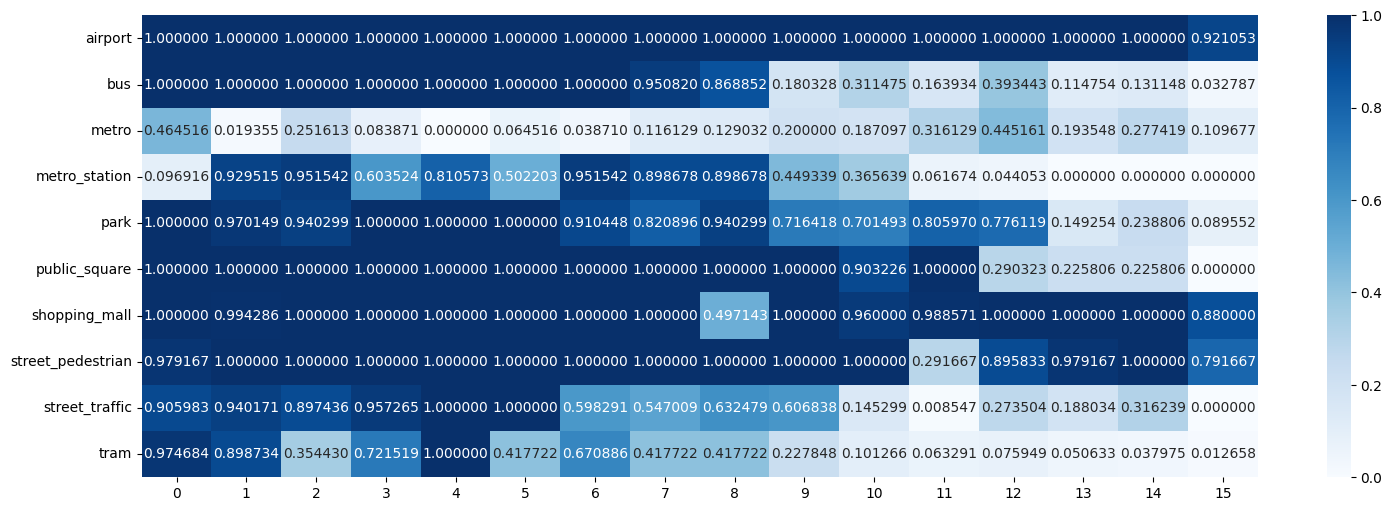

In [44]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.DataFrame(scenewise_imp_indices).transpose(), fmt='f', annot=True, cmap='Blues')